## Q1.How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

To perform a matrix multiplication between a(n,k) and b(k,m)-> For 1 row we would need mk multiplications and m(k-1) additions.

So for n rows we would get nmk multiplications.

So for n rows we would get nm(k-1) additions.


## Q2.Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?



In [9]:
%%timeit
#Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy.

import numpy as np



def mul_mat(a1,a2):
    #srt=process_time_ns()
    n=len(a1)
    k=len((a1[0]))
    m=len(a2[0])
    c=[[0]*m for t in range(n)]
  
    
    for i in range(n):
        for j in range(m):
            for p in range(k):
                c[i][j]+=a1[i][p] * a2[p][j]
    
 
    return c
            
        
        
#testcode
a1= [[1,5,8],
    [2,6,10],
    [3,7,11]]

a2= [[4,8,12],
    [5,9,13],
    [6,10,14]]

res_mat=mul_mat(a1,a2)









10.1 µs ± 577 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [8]:
%%timeit
#using numpy
import numpy as np

def mul_np(A,B):
    C=np.dot(A,B)
    return C

A= np.array([[1,5,8],[2,6,10],[3,7,11]])
B= np.array([[4,8,12],[5,9,13], [6,10,14]])

result=mul_np(A,B)


11 µs ± 485 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


We can observe that using numpy the process is slower


## Q3.Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

a. Highest element-> 1pass
b. 2nd highest-> 2 pass
so kth highest element would require kth pass of the array

median of any array of length n=> find the middle element(odd length arrays) or avargae of two middle elements (in even length arrays)-> n/2 passes are required

so T(n)= 1+2+3+.....+(n/2)
solving would give me-> T(n)=n(n+2)/8
so the time complexity is O($n^{2}$)

In [48]:
#finding the kth largest elemnet

def k_elem(arr,k):
    arr1=arr.copy()
    for i in range(k):
        mx_idx=0
        for j in range(1,len(arr1)):
            if arr1[j]>arr1[mx_idx]:
                mx_idx=j
    
        arr1[0],arr1[mx_idx]=arr1[mx_idx],arr1[0]
        mx_val=arr1.pop(0)
            
    return mx_val
    
    
    
arr=[1,5,9,12,8,17,98]
k=4

print('the 4th largest element is',k_elem(arr,k))


    

the 4th largest element is 9


In [50]:
%%timeit
#finding the kth largest elemnet

def k_elem(arr,k):
    arr1=arr.copy()
    for i in range(k):
        mx_idx=0
        for j in range(1,len(arr1)):
            if arr1[j]>arr1[mx_idx]:
                mx_idx=j
    
        arr1[0],arr1[mx_idx]=arr1[mx_idx],arr1[0]
        mx_val=arr1.pop(0)
            
    return mx_val
    
    
    
arr=[1,5,9,12,8,17,98]
k=4
b=k_elem(arr,k)

3.65 µs ± 83.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [25]:
#using np.median
import numpy as np
arr1=[1,4,3,12,2,6]
x3=np.median(arr1)
print('median element is:',x3)


median element is: 3.5


In [51]:
%%timeit
#using np.median
import numpy as np
arr1=[1,4,3,12,2,6]
x3=np.median(arr1)


44.3 µs ± 651 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Q4. What is the gradient of the following function with respect to x and y?

$$
   x^{2}y + y^{3}\sin(x)
$$


Ans-> 

A. With Respect to x is $ 2xy + y^{3}cos(x) $

B. With Respect to y is $ x^{2} + 3y^{2}sin(x) $

## Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [30]:
import numpy as np
import math
import jax
import jax.numpy as jx

def fun1(x,y):
    return (x)**2 * y + ((y)**3 )* jx.sin(x)

grad_fun1 = jax.grad(fun1,argnums = (0,1))

x= 0.2 #assumed values
y= 0.6

grad_x, grad_y = grad_fun1(x ,y)

print(" Gradient at x = ", x, ":" ,(grad_x))
print(" Gradient at y= ", y ,":" , (grad_y))
    


 Gradient at x =  0.2 : 0.45169443
 Gradient at y=  0.6 : 0.25456288


## Q6.Use sympy to confirm that you obtain the same gradient analytically.

In [31]:
import sympy as sp
from sympy import diff,sin,symbols

x,y = symbols('x y')

fun1 = (x**2) *y + (y**3) *sin(x)

grad_x = diff(fun1,x)

grad_y = diff(fun1,y)


print(" Gradient at x =" ,grad_x)
print(" Gradient at y  =" , grad_y)


 Gradient at x = 2*x*y + y**3*cos(x)
 Gradient at y  = x**2 + 3*y**2*sin(x)


## Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:


In [116]:
students_records = {
    2022: {
        "Branch 1": [
            {
                "Roll Number": 1,
                "Name": "Abdul",
                "Marks": {
                    "Maths": 100,
                    "English": 70,}
            },
            
        ],
        "Branch 2": [
            {
                "Roll Number": 2,
                "Name": "Ganesh",
                "Marks": {
                    "Maths": 80,
                    "English": 60,}
            },
        ]
    },
    2023: {
        "Branch 1": [ {
                "Roll Number": 1,
                "Name": "Gourab",
                "Marks": {
                    "Maths": 100,
                    "English": 50,}
            },
        ],
        "Branch 2": [ {
                "Roll Number": 2,
                "Name": "Ripan",
                "Marks": {
                    "Maths": 30,
                    "English": 80,}
            },
        ]
    },
    2024: {
        "Branch 1": [{
                "Roll Number": 1,
                "Name": "Musiala",
                "Marks": {
                    "Maths": 40,
                    "English": 90,}
            },
        ],
        "Branch 2": [{
                "Roll Number": 2,
                "Name": "Arpit",
                "Marks": {
                    "Maths": 70,
                    "English": 95,}
            },
        ]
    },
    2025: {
        "Branch 1": [{
                "Roll Number": 1,
                "Name": "Vishal",
                "Marks": {
                    "Maths": 100,
                    "English": 20,}
            },
        ],
        "Branch 2": [{
                "Roll Number": 2,
                "Name": "Yogesh",
                "Marks": {
                    "Maths": 100,
                    "English": 87,}
            },
        ]
    }
}


student1 = students_records[2025]["Branch 2"][0]
print("Roll Number: {student1['Roll Number']}, Name: {student1['Name']}, Marks: {student1['Marks']}")




Roll Number: {student1['Roll Number']}, Name: {student1['Name']}, Marks: {student1['Marks']}


## Q8.Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects. 

In [133]:
class Marks:
    def __init__(self, maths, english):
        self.maths = maths
        self.english = english

class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

class Studentrecord:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)
        
        
student_info= Studentrecord()

year_2022 = Year(2022)
year_2023 = Year(2023)
year_2024 = Year(2024)
year_2025 = Year(2025)
        
branch_1_2022 = Branch("Branch 1")
branch_2_2022 = Branch("Branch 2")
branch_1_2023 = Branch("Branch 1")
branch_2_2023 = Branch("Branch 2")
branch_1_2024 = Branch("Branch 1")
branch_2_2024 = Branch("Branch 2")
branch_1_2025 = Branch("Branch 1")
branch_2_2025 = Branch("Branch 2")

branch_1_2022.add_student(Student(1, "Abdul", Marks(100, 70)))
branch_2_2022.add_student(Student(2, "Ganesh", Marks(80, 60)))

branch_1_2023.add_student(Student(1, "Gourab", Marks(100, 50)))
branch_2_2023.add_student(Student(2, "Ripan", Marks(30, 80)))

branch_1_2024.add_student(Student(1, "Musiala", Marks(40, 90)))
branch_2_2024.add_student(Student(2, "Arpit", Marks(70, 95)))

branch_1_2025.add_student(Student(1, "Vishal", Marks(100, 20)))
branch_2_2025.add_student(Student(2, "Yogesh", Marks(100, 87)))


year_2022.add_branch(branch_1_2022)
year_2022.add_branch(branch_2_2022)

year_2023.add_branch(branch_1_2023)
year_2023.add_branch(branch_2_2023)

year_2024.add_branch(branch_1_2024)
year_2024.add_branch(branch_2_2024)

year_2025.add_branch(branch_1_2025)
year_2025.add_branch(branch_2_2025)

student_info.add_year(year_2022)
student_info.add_year(year_2023)
student_info.add_year(year_2024)
student_info.add_year(year_2025)

student1 = year_2025.branches[1].students[0]
print("Roll Number:",student1.roll_number, "Name:" ,student1.name, "Marks: Maths:" ,student1.marks.maths, "English:",student1.marks.english)

Roll Number: 2 Name: Yogesh Marks: Maths: 100 English: 87


## Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

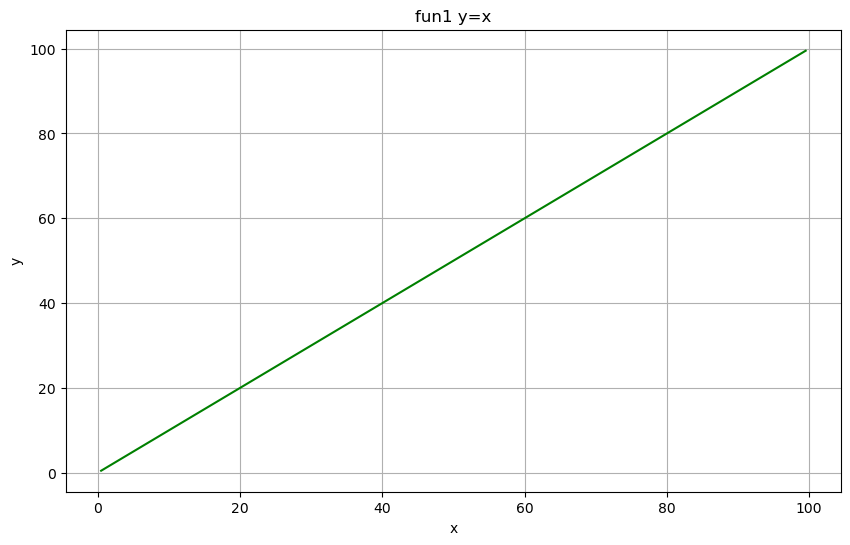

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x= np.arange(0.5,100,0.5)
y1 = x #ques 1

plt.figure(figsize=(10,6))
plt.plot(x,y1,color='green')


plt.xlabel('x')
plt.ylabel('y')
plt.title('fun1 y=x')
plt.grid(True)
plt.show()






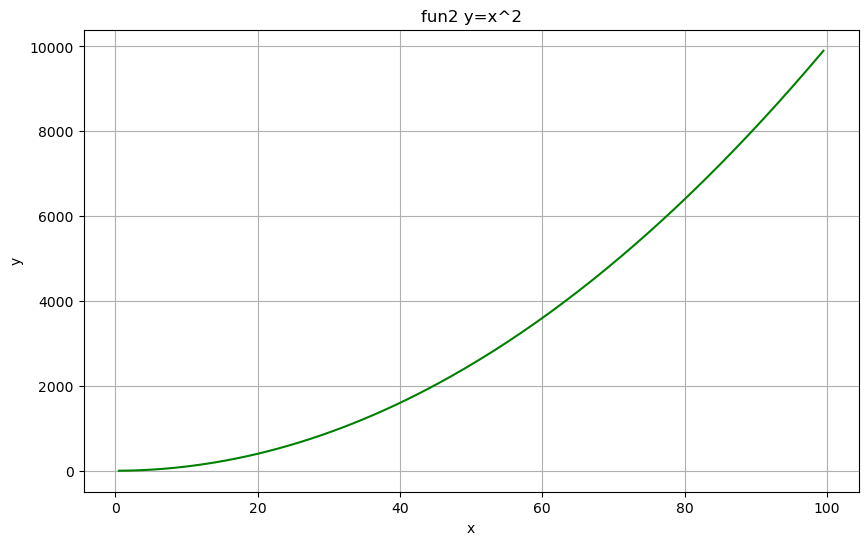

In [4]:
#q2
y2 = x**2 #ques 2

plt.figure(figsize=(10,6))
plt.plot(x,y2,color='green')


plt.xlabel('x')
plt.ylabel('y')
plt.title('fun2 y=x^2')
plt.grid(True)
plt.show()


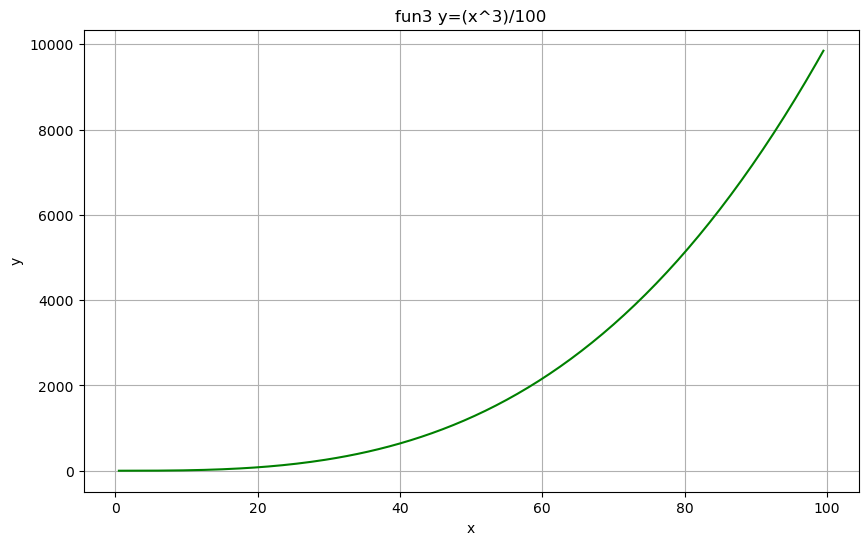

In [5]:
y3 = (x**3)/100 #ques 3

plt.figure(figsize=(10,6))
plt.plot(x,y3,color='green')


plt.xlabel('x')
plt.ylabel('y')
plt.title('fun3 y=(x^3)/100')
plt.grid(True)
plt.show()


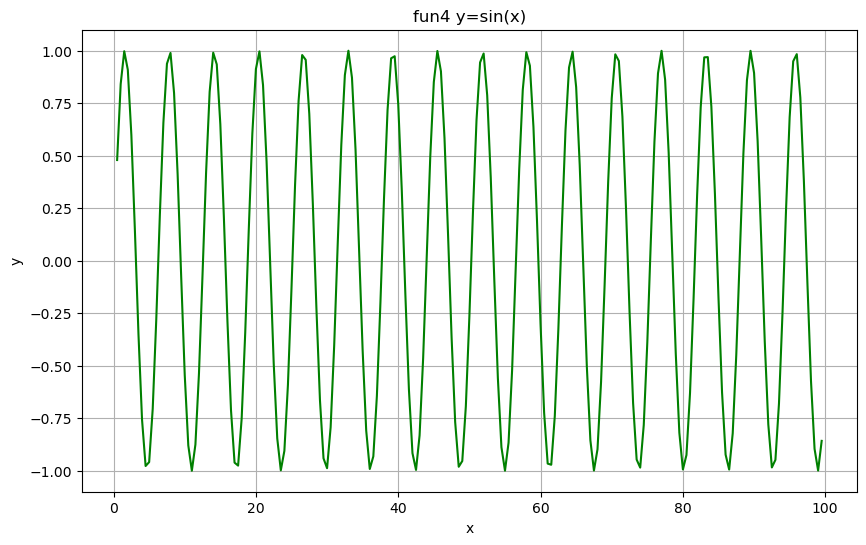

In [6]:
y4 = np.sin(x) #ques 4

plt.figure(figsize=(10,6))
plt.plot(x,y4,color='green')


plt.xlabel('x')
plt.ylabel('y')
plt.title('fun4 y=sin(x)')
plt.grid(True)
plt.show()


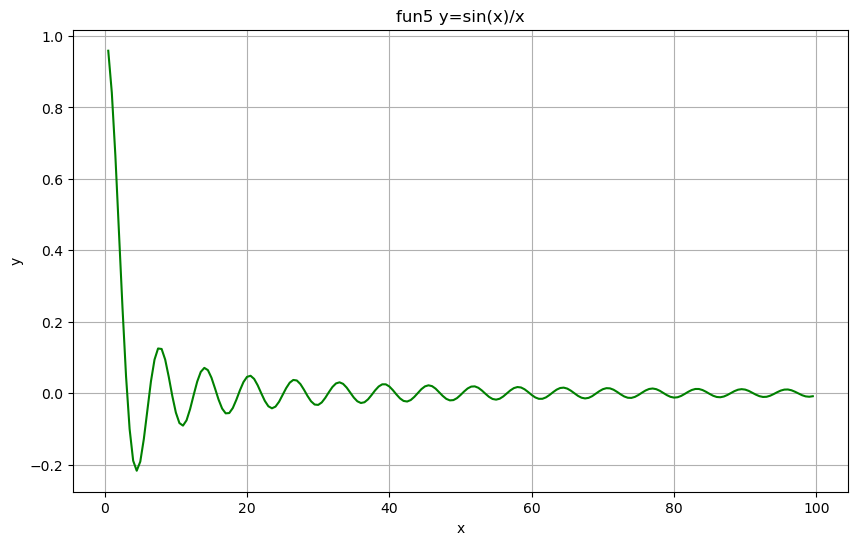

In [7]:
y5 = np.sin(x)/x #ques 5

plt.figure(figsize=(10,6))
plt.plot(x,y5,color='green')


plt.xlabel('x')
plt.ylabel('y')
plt.title('fun5 y=sin(x)/x')
plt.grid(True)
plt.show()


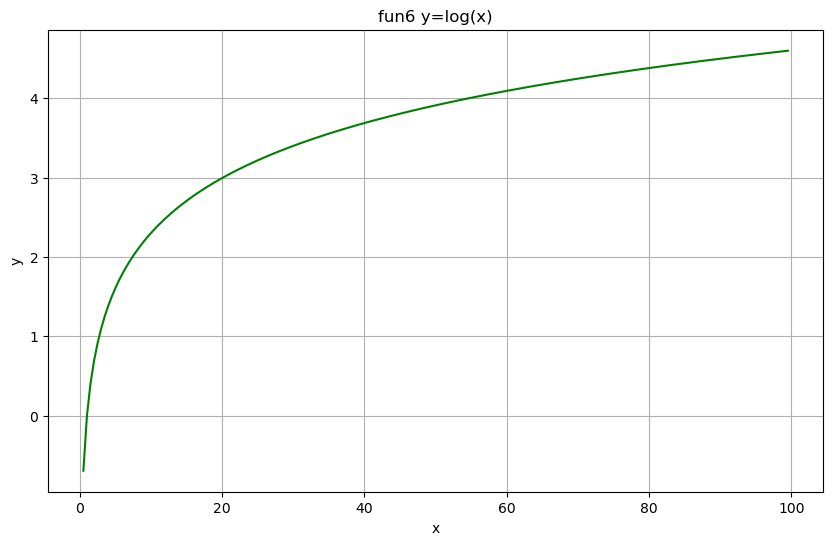

In [8]:
y6 = np.log(x) #ques 6

plt.figure(figsize=(10,6))
plt.plot(x,y6,color='green')


plt.xlabel('x')
plt.ylabel('y')
plt.title('fun6 y=log(x)')
plt.grid(True)
plt.show()


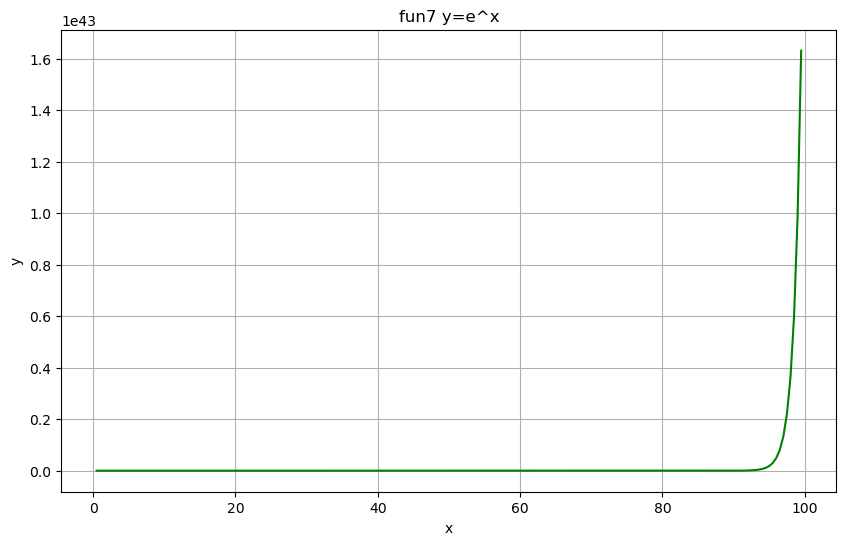

In [9]:
y7 = np.exp(x) #ques 7

plt.figure(figsize=(10,6))
plt.plot(x,y7,color='green')


plt.xlabel('x')
plt.ylabel('y')
plt.title('fun7 y=e^x')
plt.grid(True)
plt.show()


## Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean

In [97]:
#numpy to generate a matrix of size 20 X 5 containing random numbers drawn uniformly from the range of 1 to 2.

import numpy as np
mat1=np.random.uniform(1,2,size=(20,5))  #random samples from uniform distribution and returns the random samples as numpy array by using this method.
mat1





array([[1.05713068, 1.69177707, 1.08863662, 1.26676626, 1.42250961],
       [1.6201467 , 1.47511979, 1.28806591, 1.51362906, 1.21011873],
       [1.18300033, 1.51626318, 1.9774785 , 1.67391325, 1.61608686],
       [1.30102845, 1.7692557 , 1.00754139, 1.21342427, 1.77243645],
       [1.90308022, 1.93811318, 1.42718818, 1.56424194, 1.41789696],
       [1.73236884, 1.48212729, 1.86461404, 1.83659889, 1.03160409],
       [1.10672989, 1.14728026, 1.73691072, 1.11315215, 1.70248495],
       [1.86132274, 1.22353672, 1.12816992, 1.870131  , 1.51630536],
       [1.3400498 , 1.25024647, 1.89830562, 1.31691545, 1.79389422],
       [1.44543747, 1.97520266, 1.9391179 , 1.8617626 , 1.8476361 ],
       [1.46042864, 1.97232158, 1.90032401, 1.8983834 , 1.61591553],
       [1.76572569, 1.03452601, 1.22417929, 1.2691681 , 1.47687589],
       [1.62550545, 1.06957984, 1.36072258, 1.28853319, 1.44261206],
       [1.73889862, 1.60463492, 1.98543734, 1.45834567, 1.91998799],
       [1.18291843, 1.16889339, 1.

In [98]:
#Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”.

import pandas as pd
mat2= pd.DataFrame(mat1)
mat2.columns=["a","b","c","d","e"]
mat2


,a,b,c,d,e
0,1.057131,1.691777,1.088637,1.266766,1.422510
1,1.620147,1.475120,1.288066,1.513629,1.210119
2,1.183000,1.516263,1.977479,1.673913,1.616087
3,1.301028,1.769256,1.007541,1.213424,1.772436
4,1.903080,1.938113,1.427188,1.564242,1.417897
5,1.732369,1.482127,1.864614,1.836599,1.031604
6,1.106730,1.147280,1.736911,1.113152,1.702485
7,1.861323,1.223537,1.128170,1.870131,1.516305
8,1.340050,1.250246,1.898306,1.316915,1.793894
9,1.445437,1.975203,1.939118,1.861763,1.847636


In [99]:
#Find the column with the highest standard deviation

s_deviation= mat2.std()
s_deviation


a    0.265130
b    0.340881
c    0.371515
d    0.275219
e    0.225784
dtype: float64

In [100]:
print('The column with the highest std dev is =',s_deviation.idxmax())

The column with the highest std dev is = c


In [101]:
#Find the row with the lowest mean
r_mean= mat2.mean(axis=1)
r_mean

0     1.305364
1     1.421416
2     1.593348
3     1.412737
4     1.650104
5     1.589463
6     1.361312
7     1.519893
8     1.519882
9     1.813831
10    1.769475
11    1.354095
12    1.357391
13    1.741461
14    1.412335
15    1.665375
16    1.589640
17    1.528233
18    1.565929
19    1.261987
dtype: float64

In [102]:
print('The row with the lowest mean is =',r_mean.idxmin())

The row with the lowest mean is = 19


## Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [103]:
#Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”.
mat2["f"] = mat2["a"] + mat2["b"] + mat2["c"] + mat2["d"] + mat2["e"]
mat2

,a,b,c,d,e,f
0,1.057131,1.691777,1.088637,1.266766,1.422510,6.526820
1,1.620147,1.475120,1.288066,1.513629,1.210119,7.107080
2,1.183000,1.516263,1.977479,1.673913,1.616087,7.966742
3,1.301028,1.769256,1.007541,1.213424,1.772436,7.063686
4,1.903080,1.938113,1.427188,1.564242,1.417897,8.250520
5,1.732369,1.482127,1.864614,1.836599,1.031604,7.947313
6,1.106730,1.147280,1.736911,1.113152,1.702485,6.806558
7,1.861323,1.223537,1.128170,1.870131,1.516305,7.599466
8,1.340050,1.250246,1.898306,1.316915,1.793894,7.599412
9,1.445437,1.975203,1.939118,1.861763,1.847636,9.069157


In [104]:
mat2["g"] = np.nan
mat2["g"]=mat2["g"].astype(str) 
mat2


,a,b,c,d,e,f,g
0,1.057131,1.691777,1.088637,1.266766,1.422510,6.526820,nan
1,1.620147,1.475120,1.288066,1.513629,1.210119,7.107080,nan
2,1.183000,1.516263,1.977479,1.673913,1.616087,7.966742,nan
3,1.301028,1.769256,1.007541,1.213424,1.772436,7.063686,nan
4,1.903080,1.938113,1.427188,1.564242,1.417897,8.250520,nan
5,1.732369,1.482127,1.864614,1.836599,1.031604,7.947313,nan
6,1.106730,1.147280,1.736911,1.113152,1.702485,6.806558,nan
7,1.861323,1.223537,1.128170,1.870131,1.516305,7.599466,nan
8,1.340050,1.250246,1.898306,1.316915,1.793894,7.599412,nan
9,1.445437,1.975203,1.939118,1.861763,1.847636,9.069157,nan


In [107]:
count=0
for i in mat2['f']:
    if(i<8):
        mat2.loc[count,'g']='LT8'
    else:
        mat2.loc[count,'g']='GT8'
    count+=1
mat2
    

,a,b,c,d,e,f,g
0,1.057131,1.691777,1.088637,1.266766,1.422510,6.526820,LT8
1,1.620147,1.475120,1.288066,1.513629,1.210119,7.107080,LT8
2,1.183000,1.516263,1.977479,1.673913,1.616087,7.966742,LT8
3,1.301028,1.769256,1.007541,1.213424,1.772436,7.063686,LT8
4,1.903080,1.938113,1.427188,1.564242,1.417897,8.250520,GT8
5,1.732369,1.482127,1.864614,1.836599,1.031604,7.947313,LT8
6,1.106730,1.147280,1.736911,1.113152,1.702485,6.806558,LT8
7,1.861323,1.223537,1.128170,1.870131,1.516305,7.599466,LT8
8,1.340050,1.250246,1.898306,1.316915,1.793894,7.599412,LT8
9,1.445437,1.975203,1.939118,1.861763,1.847636,9.069157,GT8


In [114]:
count = mat2[mat2['g'] == 'LT8'].shape[0]
print('the number of rows in the dataframe where the value in the column g is LT8 is:',count)

the number of rows in the dataframe where the value in the column g is LT8 is: 15


In [108]:
sd1= mat2.loc[mat2['g']=='LT8','f'].std()
sd2= mat2.loc[mat2['g']=='GT8','f'].std()

print('The std dev of the column f for the rows where the value in the column g is LT8: ',sd1)
print('The std dev of the column f for the rows where the value in the column g is GT8: ',sd2)

The std dev of the column f for the rows where the value in the column g is LT8:  0.5577949021236013
The std dev of the column f for the rows where the value in the column g is GT8:  0.3469334213531304


## Q12. Write a small piece of code to explain broadcasting in numpy.

Ans:  Broadcasting refers ->handle arrays with different dimensions when doing arithmetic operations

In [35]:
import numpy as np

a = np.array([1,2,3]) # 1d array of shape (3,1)
b = np.array([[6,7,8], 
            [8,9,10],
            [10,11,12]]) #2d array of shape (3,3)

c = a + b

c

array([[ 7,  9, 11],
       [ 9, 11, 13],
       [11, 13, 15]])

Result shows that numpy broadcasts a array across each row of b array. c is resultant of this.

## Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [33]:
import numpy as np

def fun1(arr):
    index=0
    value=arr[0]
    
    for i in range (1,len(arr)):
        
        if arr[i] < value:
            value=arr[i]
            index=i
    return index

#testcode

arr = np.random.randint(1,10,20)
print("the initial array is :"  ,arr)

minimum_index = fun1(arr)

print('the index of minimum element is' , minimum_index)

#Verify with argmin command

print("The minimum index using argmin is:", np.argmin(arr))



the initial array is : [9 2 7 8 1 4 5 2 2 3 2 1 8 3 6 5 2 5 8 1]
the index of minimum element is 4
The minimum index using argmin is: 4
